In [1]:
import pandas as pd
import sqlite3 as sql
from matplotlib import pyplot as plt

In [2]:
conn = sql.connect("aceap.db")
c = conn.cursor()

In [3]:
T = ['aceap1001', 'aceap1002', 'aceap1003', 'aceap1000', 'aceap1005']
C = ['aceap1006', 'aceap1007', 'aceap1008', 'aceap1009', 'aceap1010']
users = T + C
users = pd.DataFrame(users, columns=['username'])
users['treatment'] = users['username'].isin(T)

In [4]:
profiles = pd.read_sql_query("SELECT * FROM profiles", conn)
signals = pd.read_sql_query("SELECT * FROM signals", conn)
posts = pd.read_sql_query("SELECT * FROM `Reddit-posts`", conn)

In [5]:
users = pd.merge(users, profiles, left_on='username', right_on='username', how='inner')[['username', 'treatment', 'id']]

In [6]:
before = signals[signals['experiment'] == 'pilotv1-initial']
after = signals[signals['experiment'] == 'pilotv1-gaming-day-99' ]

In [7]:
before = pd.merge(before, users, left_on='user', right_on='id', how='inner', suffixes=('_signal', '_user'))[['id_signal', 'info', 'treatment', 'username']]
after = pd.merge(after, users, left_on='user', right_on='id', how='inner', suffixes=('_signal', '_user'))[['id_signal', 'info', 'treatment', 'username']]
before.columns = ['signal', 'record', 'is_treatment', 'user']
after.columns = ['signal', 'record', 'is_treatment', 'user']

In [8]:
before = pd.merge(before, posts, left_on='record', right_on='record-id', how='inner')[['is_treatment', 'user', 'subreddit', 'title', 'selftext', 'url', 'score', 'num_comments', 'author', 'id']]
after = pd.merge(after, posts, left_on='record', right_on='record-id', how='inner')[['is_treatment', 'user', 'subreddit', 'title', 'selftext', 'url', 'score', 'num_comments', 'author', 'id']]

In [9]:
before_control = before[before['is_treatment'] == False]
before_treatment = before[before['is_treatment'] == True]

after_control = after[after['is_treatment'] == False]
after_treatment = after[after['is_treatment'] == True]

# Source Diversity

In [10]:
import numpy as np
from scipy.stats import entropy

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)


bt = before_treatment.groupby('user').agg({'subreddit': lambda x: entropy1(x)}).mean()['subreddit']
bc = before_control.groupby('user').agg({'subreddit': lambda x: entropy1(x)}).mean()['subreddit']
at = after_treatment.groupby('user').agg({'subreddit': lambda x: entropy1(x)}).mean()['subreddit']
ac = after_control.groupby('user').agg({'subreddit': lambda x: entropy1(x)}).mean()['subreddit']

Text(0, 0.5, 'Subreddit Entropy')

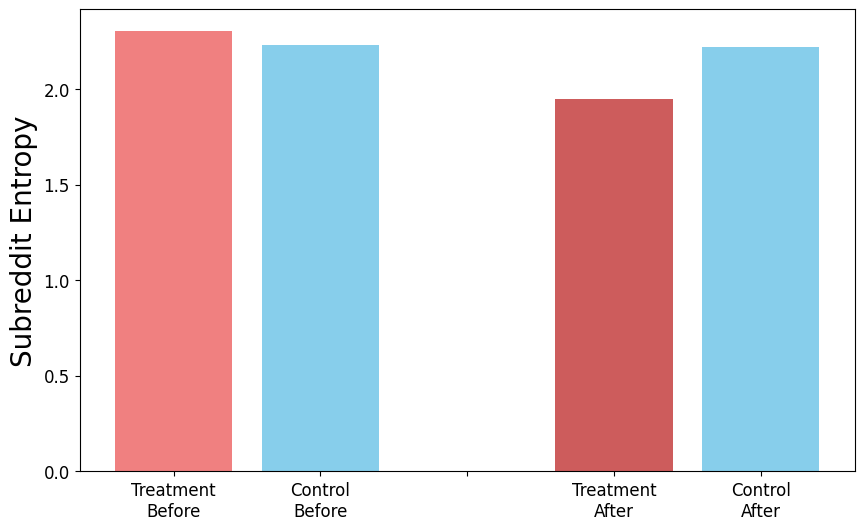

In [11]:
# set font size
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.bar([0, 1, 2, 3, 4], [bt, bc, 0, at, ac], tick_label=['Treatment\nBefore', 'Control\nBefore', '', 'Treatment\nAfter', 'Control\nAfter'], color=['lightcoral', 'skyblue', 'white', 'indianred', 'skyblue'])
ax.set_ylabel('Subreddit Entropy', fontsize=20)
# ax.set_xticklabels(my_dict.keys())

# Populist

In [15]:
bt = list(before_treatment['score'])
bc = list(before_control['score'])
at = list(after_treatment['score'])
ac = list(after_control['score'])

Text(0, 0.5, 'Upvote')

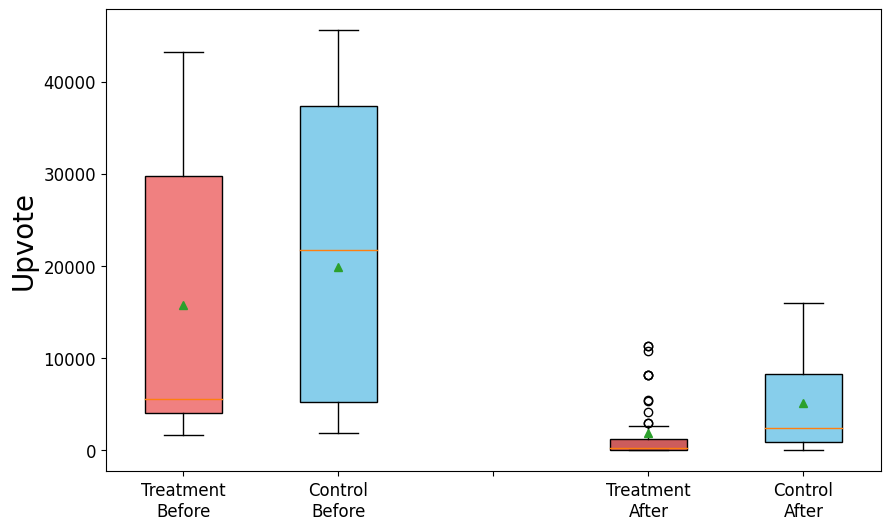

In [18]:

bt = list(before_treatment['score'])
bc = list(before_control['score'])
at = list(after_treatment['score'])
ac = list(after_control['score'])

# set font size
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
bp = ax.boxplot([bt, bc, [], at, ac], showmeans=True, patch_artist=True)
ax.set_xticklabels(['Treatment\nBefore', 'Control\nBefore', '', 'Treatment\nAfter', 'Control\nAfter'])

# set boxplot colors
colors = ['lightcoral', 'skyblue', 'white', 'indianred', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)



ax.set_ylabel('Upvote', fontsize=20)
# ax.set_xticklabels(my_dict.keys())

Text(0, 0.5, 'Comments')

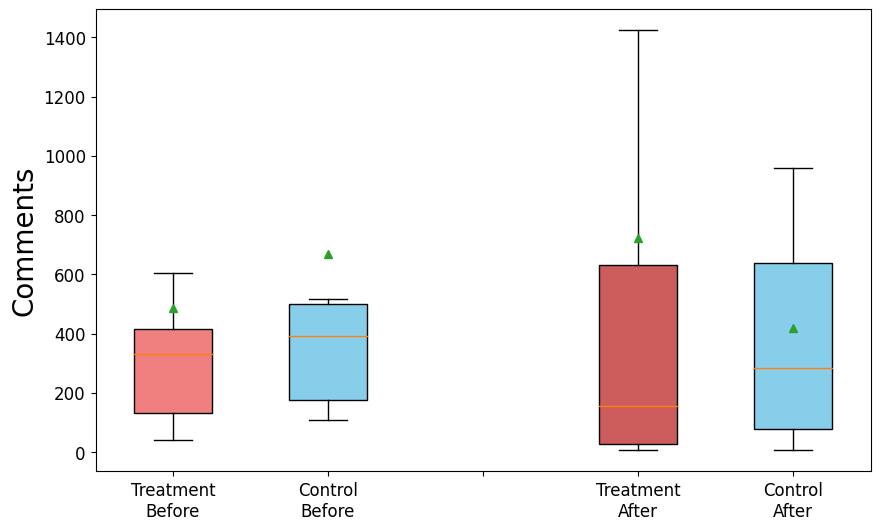

In [19]:
bt = list(before_treatment['num_comments'])
bc = list(before_control['num_comments'])
at = list(after_treatment['num_comments'])
ac = list(after_control['num_comments'])

# set font size
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
bp = ax.boxplot([bt, bc, [], at, ac], showmeans=True, patch_artist=True, showfliers=False)
ax.set_xticklabels(['Treatment\nBefore', 'Control\nBefore', '', 'Treatment\nAfter', 'Control\nAfter'])

# set boxplot colors
colors = ['lightcoral', 'skyblue', 'white', 'indianred', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)



ax.set_ylabel('Comments', fontsize=20)
# ax.set_xticklabels(my_dict.keys())

# Compare Users

In [69]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

jaccard(['b', 'a', 'c', 'e'], ['a', 'c', 'b', 'e'])

1.0

In [21]:
# group before_treatment by user and aggregate id into list

In [22]:
#compute jaccard similarity for each user with each user

# repeat this for before_control, after_treatment, after_control

In [57]:
at = after_treatment.groupby('user').agg({'id': lambda x: list(x)})
at

,id
user,
aceap1000,"[14s8zoj, 14su478, 14t0eeg, 14t6ler, 14st2ps, ..."
aceap1001,"[14s8zoj, 14s6zmw, 14t0eeg, 14su478, 14t6ler, ..."
aceap1002,"[14tdvfp, 14swu0z, 14szm9l, 14t5nnt, 14s5q6x, ..."
aceap1003,"[14tdvfp, 14swu0z, 14su5ve, 14t5nnt, 14s5q6x, ..."
aceap1005,"[14swu0z, 14rcimd, 14t9bag, 14qyrfq, 14r7js5, ..."


In [76]:
bt = before_treatment.groupby('user').agg({'id': lambda x: list(x)})
jaccard_sim = []
for i in range(len(bt)):
    for j in range(len(bt)):
        if i != j:
            jaccard_sim.append(jaccard(bt.iloc[i]['id'], bt.iloc[j]['id']))

bt = jaccard_sim

bc = before_control.groupby('user').agg({'id': lambda x: list(x)})
jaccard_sim = []
for i in range(len(bc)):
    for j in range(len(bc)):
        if i != j:
            jaccard_sim.append(jaccard(bc.iloc[i]['id'], bc.iloc[j]['id']))

bc = jaccard_sim

at = after_treatment.groupby('user').agg({'id': lambda x: list(x)})
jaccard_sim = []
for i in range(len(at)):
    for j in range(len(at)):
        if i != j:
            jaccard_sim.append(jaccard(at.iloc[i]['id'], at.iloc[j]['id']))

at = jaccard_sim

ac = after_control.groupby('user').agg({'id': lambda x: list(x)})
jaccard_sim = []
for i in range(len(ac)):
    for j in range(len(ac)):
        if i != j:
            jaccard_sim.append(jaccard(ac.iloc[i]['id'], ac.iloc[j]['id']))

ac = jaccard_sim

Text(0, 0.5, 'Jaccard Similarity\n of posts Within Users')

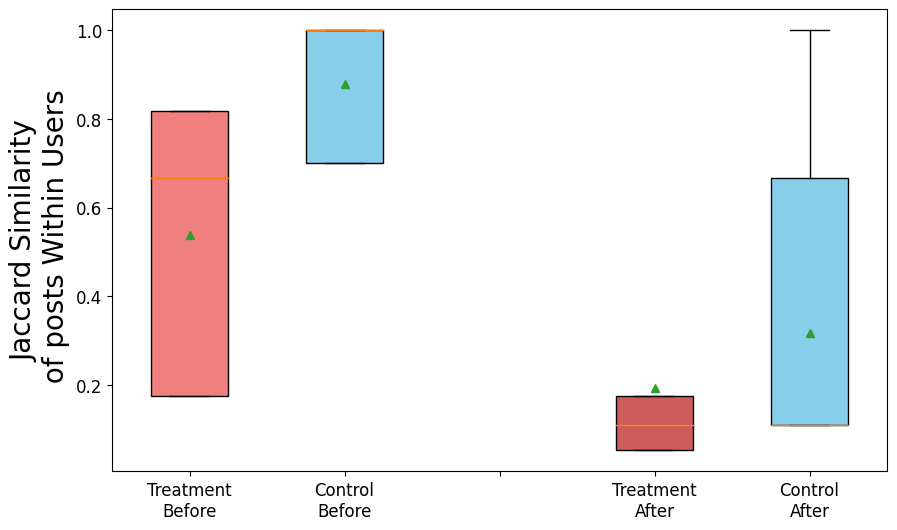

In [77]:
# set font size
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
bp = ax.boxplot([bt, bc, [], at, ac], showmeans=True, patch_artist=True, showfliers=False)
ax.set_xticklabels(['Treatment\nBefore', 'Control\nBefore', '', 'Treatment\nAfter', 'Control\nAfter'])


# set boxplot colors
colors = ['lightcoral', 'skyblue', 'white', 'indianred', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)


ax.set_ylabel('Jaccard Similarity\n of posts Within Users', fontsize=20)
# ax.set_xticklabels(my_dict.keys())

In [80]:
bt = before_treatment.groupby('user').agg({'subreddit': lambda x: list(x)})
jaccard_sim = []
for i in range(len(bt)):
    for j in range(len(bt)):
        if i != j:
            jaccard_sim.append(jaccard(bt.iloc[i]['subreddit'], bt.iloc[j]['subreddit']))

bt = jaccard_sim

bc = before_control.groupby('user').agg({'subreddit': lambda x: list(x)})
jaccard_sim = []
for i in range(len(bc)):
    for j in range(len(bc)):
        if i != j:
            jaccard_sim.append(jaccard(bc.iloc[i]['subreddit'], bc.iloc[j]['subreddit']))

bc = jaccard_sim

at = after_treatment.groupby('user').agg({'subreddit': lambda x: list(x)})
jaccard_sim = []
for i in range(len(at)):
    for j in range(len(at)):
        if i != j:
            jaccard_sim.append(jaccard(at.iloc[i]['subreddit'], at.iloc[j]['subreddit']))

at = jaccard_sim

ac = after_control.groupby('user').agg({'subreddit': lambda x: list(x)})
jaccard_sim = []
for i in range(len(ac)):
    for j in range(len(ac)):
        if i != j:
            jaccard_sim.append(jaccard(ac.iloc[i]['subreddit'], ac.iloc[j]['subreddit']))

ac = jaccard_sim

Text(0, 0.5, 'Jaccard Similarity\n of subreddits Within Users')

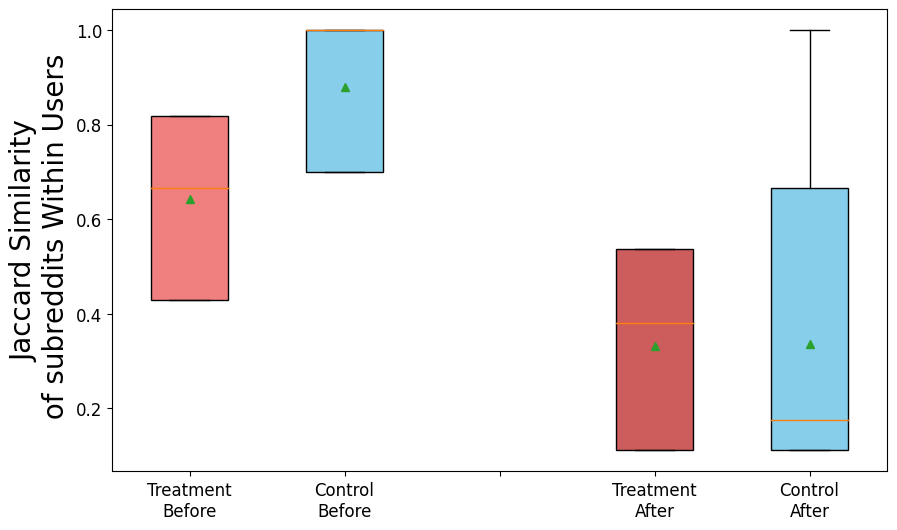

In [81]:
# set font size
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
bp = ax.boxplot([bt, bc, [], at, ac], showmeans=True, patch_artist=True, showfliers=False)
ax.set_xticklabels(['Treatment\nBefore', 'Control\nBefore', '', 'Treatment\nAfter', 'Control\nAfter'])


# set boxplot colors
colors = ['lightcoral', 'skyblue', 'white', 'indianred', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)


ax.set_ylabel('Jaccard Similarity\n of subreddits Within Users', fontsize=20)
# ax.set_xticklabels(my_dict.keys())

In [46]:
at = list(before_treatment.groupby('subreddit').count().sort_values('title', ascending=False).index)
ac = list(before_control.groupby('subreddit').count().sort_values('title', ascending=False).index)

In [47]:
before_df = pd.DataFrame({'treatment': at[:10], 'control': ac[:10]})

In [48]:
at = list(after_treatment.groupby('subreddit').count().sort_values('title', ascending=False).index)
ac = list(after_control.groupby('subreddit').count().sort_values('title', ascending=False).index)

In [49]:
after_df = pd.DataFrame({'treatment': at[:10], 'control': ac[:10]})

In [51]:
before_df.columns = ['before treatment', 'before control']
after_df.columns = ['after treatment', 'after control']
total_df = pd.concat([before_df, after_df], axis=1)

In [52]:
total_df

,before treatment,before control,after treatment,after control
0,CrappyDesign,CrappyDesign,gaming,Damnthatsinteresting
1,MadeMeSmile,MadeMeSmile,pcmasterrace,facepalm
2,aww,aspiememes,IndianGaming,antiwork
3,nextfuckinglevel,aww,buildapc,Truckers
4,oddlysatisfying,nextfuckinglevel,IndieGaming,BotezLive
5,starterpacks,therewasanattempt,PcBuild,marvelstudios
6,aspiememes,whatisthisthing,GamingDetails,carolinekonstnar
7,whatisthisthing,PeopleFuckingDying,PcBuildHelp,Unexpected
8,therewasanattempt,oddlysatisfying,carolinekonstnar,WhitePeopleTwitter
9,AnarchyChess,starterpacks,facepalm,OutOfTheLoop
